In [1]:
import optforge as of
from optforge.benchmark.vobench_benchmarks import VOBenchmark
import vobench as vb
import lmfit
import numpy as np
inputs = vb.imread(r"F:\Stuff\Programming\AI\VOBench\notebooks\affine\A2.jpeg")[:,:,0]
targets = vb.imread(r"F:\Stuff\Programming\AI\VOBench\notebooks\affine\A.jpeg")[:,:,0]

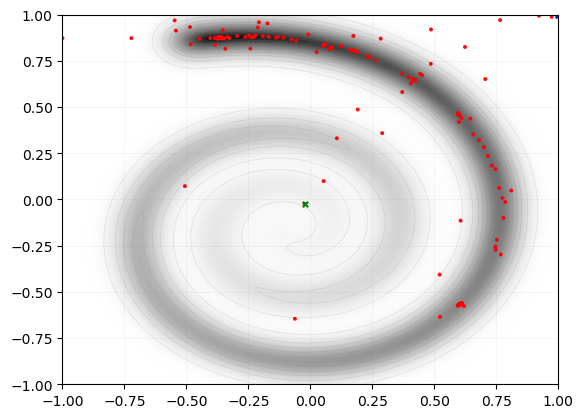

In [2]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

params = lmfit.Parameters()
params.add('x', vob.params[0], min = -1, max = 1)
params.add('y', vob.params[1], min = -1, max = 1)

lmfit.minimize(
    lambda params: vob.step_noline((params['x'].value, params['y'].value)),
    params,
    method = 'ampgo',
    max_nfev = 1000,
)

vob.plot()

evals: 1000/1000 | best value: 0.0196                            
Job finished in 0.6s., did 1000 evaluations.


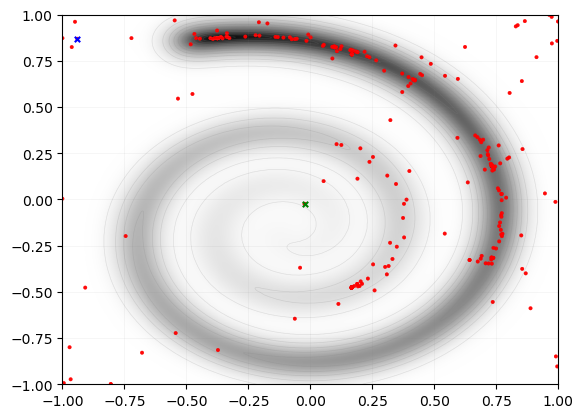

In [3]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

optimizer = of.integrations.LMFitOptimizer('ampgo')

study = of.minimize(
    vob.step_noline,
    vob.params,
    optimizer,
    max_evals = 1000,
    bounds = (-1, 1)
)

vob.plot()